# **Face Recognition**

Facial Recognition System is a technology capable of matching a human face from a digital image or a video frame against a database of faces, typically employed to authenticate users through ID verification services, works by pinpointing and measuring facial features from a given image.

We'll be building a face recognition model that uses Siamese Networks to give us a distance value that indicates whether 2 images are same or different.

The Dataset
We'll be using the Extracted Faces from face-recognition-dataset, which is derived from the LFW Dataset. The Extracted Faces contains faces extracted from the base images using Haar-Cascade Face-Detection (CV2).

* The dataset contains 1324 different individuals, with 2-50 images per person.
* The images are of size (128,128,3) and are encoded in RGB.
* Each folder and image is named with a number, i.e 0.jpg, 1.jpg

In [1]:
import os
import cv2
import time
import random
import numpy as np

import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import preprocess_input

import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__, np.__version__

('2.6.2', '1.20.3')

In [2]:

from tensorflow.keras.models import load_model

In [3]:
model = load_model('/kaggle/input/mobilenet-classification/MobileNet_saved_model.h5')
# import tensorflow.keras.backend as K
# def custom_function(x):
#     return K.square(x) 
encoder=load_model('/kaggle/input/new_encoder/keras/default/1/last_encoder(90%_test).h5')

In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import numpy as np

def preprocess_new_image(image_path, target_size=(224, 224)):
    """
    Preprocess the image to prepare it for the model.
    Args:
        image_path (str): Path to the new image.
        target_size (tuple): Target size to resize the image.
    Returns:
        np.array: Preprocessed image.
    """
    # Load and resize the image
    image = load_img(image_path, target_size=target_size)
    
    # Convert the PIL image to a NumPy array
    image_array = img_to_array(image)  # Shape: (224, 224, 3)
    
    # Apply sharpening filter using OpenCV
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]]) 
    sharpened_image = cv2.filter2D(image_array.astype(np.uint8), -1, kernel)
    
    # Normalize pixel values to [0, 1]
    sharpened_image = sharpened_image / 255.0
    
    # Expand dimensions to match model input shape: (1, 224, 224, 3)
    preprocessed_image = np.expand_dims(sharpened_image, axis=0)
    
    return preprocessed_image


In [5]:
from sklearn.metrics import accuracy_score
import numpy as np
import os

def load_images(folder_path):
    all_diseases = sorted(os.listdir(folder_path))
    images = []
    labels = []
    for class_label in all_diseases:
        class_path = os.path.join(folder_path, class_label)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)

                img_array = preprocess_new_image(img_path)  # Assume this function processes the image correctly
                class_label = class_label.split("___")[0]  # Assuming labels are embedded in folder names

                images.append(img_array)
                labels.append(class_label)
    return np.vstack(images), np.array(labels)

In [6]:
# Load test data
X_test, y_test = load_images('/kaggle/input/disscus/test data/Test Data/Test Data/Test samples for stage 1 (classification) and stage 2 (recognition)')

# Predict using the model
y_pred_label = model.predict(X_test)  # Assuming model is preloaded and trained

In [7]:
# Map predicted numeric labels to class names if needed

class_mapping = {
    0: "Apple",
    1: "Cherry_(including_sour)",
    2: "Corn_(maize)",
    3: "Grape",
    4: "Peach",
    5: "Pepper,_bell",
    6: "Potato",
    7: "Strawberry",
    8: "Tomato"
}
if hasattr(model, "classes"):  # Some sklearn models have classes_ attribute
    ypred = [model.classes[np.argmax(pred)] for pred in y_pred_label]
else:
    y_pred = [class_mapping.get(np.argmax(pred), "Unknown") for pred in y_pred_label]

In [8]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import os




import numpy as np
from sklearn.metrics import accuracy_score



# Ensure y_test and y_pred are comparable numpy arrays
y_pred = np.array(y_pred)  # Predictions
y_test = np.array(y_test)  # Ground truth labels

# Check shapes before accuracy calculation
if y_pred.shape != y_test.shape:
    raise ValueError(f"Shape mismatch: y_test {y_test.shape}, y_pred {y_pred.shape}")

# Print predictions and corresponding ground truth labels
print("Predictions vs Ground Truth:")
for i in range(len(y_test)):
    print(f"y_test: {y_test[i]} , y_pred: {y_pred[i]}")

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")






# def classify_images(face_list1, face_list2, threshold=1.2):
#     """
#     Compares two images using the encoder model and returns predictions.
#     """
#     # Get encodings for the passed images
#     tensor1 = encoder.predict(face_list1)
#     tensor2 = encoder.predict(face_list2)

#     # Calculate the distance between encodings
#     distance = np.sum(np.square(tensor1 - tensor2), axis=-1)

#     # Prediction: 0 if similar, 1 if dissimilar
#     prediction = np.where(distance <= threshold, 0, 1)
#     return prediction# Ensure y_test and y_pred are comparable
# y_pred = np.array(y_pred)
# y_test = np.array(y_test)

# # Calculate accuracy
# # for i in range(len(y_test)):

# #     print(f"y_test : {y_test[i]} , y_pred : {y_pred[i]}" )

# # print("y_pred (label) :" ,y_pred)
# acc = accuracy_score(y_test, y_pred)
# print("Accuracy:", acc * 100)

Predictions vs Ground Truth:
y_test: Apple , y_pred: Apple
y_test: Apple , y_pred: Apple
y_test: Apple , y_pred: Apple
y_test: Apple , y_pred: Apple
y_test: Apple , y_pred: Apple
y_test: Apple , y_pred: Apple
y_test: Apple , y_pred: Apple
y_test: Apple , y_pred: Apple
y_test: Apple , y_pred: Apple
y_test: Apple , y_pred: Apple
y_test: Apple , y_pred: Apple
y_test: Apple , y_pred: Apple
y_test: Apple , y_pred: Apple
y_test: Apple , y_pred: Apple
y_test: Apple , y_pred: Apple
y_test: Apple , y_pred: Apple
y_test: Cherry_(including_sour) , y_pred: Cherry_(including_sour)
y_test: Cherry_(including_sour) , y_pred: Cherry_(including_sour)
y_test: Cherry_(including_sour) , y_pred: Cherry_(including_sour)
y_test: Cherry_(including_sour) , y_pred: Cherry_(including_sour)
y_test: Cherry_(including_sour) , y_pred: Cherry_(including_sour)
y_test: Cherry_(including_sour) , y_pred: Cherry_(including_sour)
y_test: Cherry_(including_sour) , y_pred: Cherry_(including_sour)
y_test: Cherry_(including_sou

In [9]:
import cv2
import numpy as np

import cv2
import numpy as np

def preprocess_new_image(img_path):
    # Read and resize the image
    img = cv2.imread(img_path)
    if img is None:
        raise FileNotFoundError(f"Image at {img_path} could not be loaded. Check the path.")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
    img_resized = cv2.resize(img, (128, 128))   # Resize to (128, 128)
    img_normalized = img_resized / 255.0        # Normalize the image
    
    # Expand dimensions to add the batch size: (1, 128, 128, 3)
    img_batch = np.expand_dims(img_normalized, axis=0)
    return img_batch



In [10]:
import os
import numpy as np

def load_images_rec(folder_path):
    all_diseases = sorted(os.listdir(folder_path))
    images = []
    labels = []
    for class_label in all_diseases:
        class_path = os.path.join(folder_path, class_label)
        if os.path.isdir(class_path):  # Check if it's a directory
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                try:
                    # Process the image and append it to the list
                    img_array = preprocess_new_image(img_path)
                    images.append(img_array)
                    labels.append(class_label)
                except Exception as e:
                    print(f"Error processing {img_path}: {e}")
    
    # Stack all the images and labels
    return np.vstack(images), np.array(labels)


X_test2, y_test2 = load_images_rec('/kaggle/input/disscus/test data/Test Data/Test Data/Test samples for stage 1 (classification) and stage 2 (recognition)')

In [11]:
len(y_pred)

177

In [12]:
import cv2
import numpy as np
import os


def classify_images(face_list1, face_list2):
    """
    Compares two images using the encoder model and returns distances.
    """
    # Ensure inputs have batch dimensions (expand if necessary)
    if len(face_list1.shape) == 3:  # (128, 128, 3)
        face_list1 = np.expand_dims(face_list1, axis=0)  # Add batch dimension
    if len(face_list2.shape) == 3:
        face_list2 = np.expand_dims(face_list2, axis=0)

    # Get encodings for the passed images
    tensor1 = encoder.predict(face_list1)
    tensor2 = encoder.predict(face_list2)

    # Calculate the distance between encodings
    distance = np.sum(np.square(tensor1 - tensor2), axis=-1)
    
    return distance


def xyz(target_batch, label):
    """
    Finds the subfolder with the minimum distance to the target image.
    """
    comparison_results = {}
    folder_path = f'/kaggle/input/support/Support_set/one shot/{label}'

    # Iterate over each subfolder
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):  # Ensure it's a directory
            comparison_results[subfolder] = []

            # Iterate over all image files in the subfolder
            for file_name in os.listdir(subfolder_path):
                file_path = os.path.join(subfolder_path, file_name)

                # Check if it's an image file
                if file_name.endswith(('.JPG', '.JPEG', '.PNG')):
                    image = cv2.imread(file_path)
                    if image is not None:
                        image_resized = cv2.resize(image, (128, 128))
                        image_normalized = image_resized / 255.0
                        image_batch = np.expand_dims(image_normalized, axis=0)

                        # Compare target image with current image
                        distance = classify_images(target_batch, image_batch)
                        # Append the distance to the comparison results
                        comparison_results[subfolder].append(distance[0])
                        # print(comparison_results)

    # Find the subfolder with the minimum distance
    min_distance = float('inf')
    best_subfolder = None

    for subfolder, distances in comparison_results.items():
        if distances:
            # Get the minimum distance in the current subfolder
            subfolder_min_distance = min(distances)

            # Update the global minimum if this subfolder has a smaller distance
            if subfolder_min_distance < min_distance:
                min_distance = subfolder_min_distance
                best_subfolder = subfolder

    if best_subfolder is not None:
        print(f"Subfolder with Minimum Distance: {best_subfolder} , Minimum Distance: {min_distance:.4f}")
        return best_subfolder
    else:
        print("No subfolders with images to compare.")
        return None


# Assuming X_test2 and y_pred are defined and populated correctly before this
Reco = []
y_pred2 = []

# Populate Reco with tuples of (image_batch, label) for each sample
for i in range(len(y_pred)):
    Reco.append((X_test2[i], y_pred[i]))

# Iterate over Reco to call the xyz function and append the result to y_pred2
for i in range(len(y_pred)):
    Image, label = Reco[i]
    Back = xyz(Image, label)
    y_pred2.append(Back)

# Now, y_pred2 contains the subfolders with the smallest distance for each comparison


Subfolder with Minimum Distance: Apple___Apple_scab , Minimum Distance: 0.5275
Subfolder with Minimum Distance: Apple___Apple_scab , Minimum Distance: 0.4219
Subfolder with Minimum Distance: Apple___Apple_scab , Minimum Distance: 0.1491
Subfolder with Minimum Distance: Apple___Black_rot , Minimum Distance: 0.7876
Subfolder with Minimum Distance: Apple___Black_rot , Minimum Distance: 0.9010
Subfolder with Minimum Distance: Apple___Black_rot , Minimum Distance: 0.3292
Subfolder with Minimum Distance: Apple___Black_rot , Minimum Distance: 0.1694
Subfolder with Minimum Distance: Apple___Black_rot , Minimum Distance: 0.0495
Subfolder with Minimum Distance: Apple___Black_rot , Minimum Distance: 0.0704
Subfolder with Minimum Distance: Apple___Black_rot , Minimum Distance: 0.1454
Subfolder with Minimum Distance: Apple___healthy , Minimum Distance: 0.6782
Subfolder with Minimum Distance: Apple___Apple_scab , Minimum Distance: 0.5468
Subfolder with Minimum Distance: Apple___healthy , Minimum Dis

In [13]:
# Reco=[]
# # Reco.append((X_test2,y_pred))
# y_pred2=[]
# for  i in range(len(y_pred)):
#     Reco.append( (X_test2[i] , y_pred[i]) )

# print()

# for i in range (len(y_pred)):
#     Image,label=Reco[i]
#     # print(label,'\n')
#     Back=xyz(Image,label)
#     y_pred2.append(Back)



In [14]:
y_test2 = np.array(y_test2)
acc = accuracy_score(y_test2, y_pred2)
print("Accuracy:", acc * 100)
y_pred2 = np.array(y_pred2)

Accuracy: 59.32203389830508


In [15]:
def classify_images(face_list1, face_list2, threshold=1.2):
    """
    Compares two images using the encoder model and returns predictions.
    """
    # Ensure inputs have batch dimensions (expand if necessary)
    if len(face_list1.shape) == 3:  # (128, 128, 3)
        face_list1 = np.expand_dims(face_list1, axis=0)  # Add batch dimension
    if len(face_list2.shape) == 3:
        face_list2 = np.expand_dims(face_list2, axis=0)

    # Get encodings for the passed images
    tensor1 = encoder.predict(face_list1)
    tensor2 = encoder.predict(face_list2)

    # Calculate the distance between encodings
    distance = np.sum(np.square(tensor1 - tensor2), axis=-1)

    # Prediction: 0 if similar, 1 if dissimilar
    prediction = np.where(distance <= threshold, 0, 1)
    return prediction




In [16]:
import os
import cv2
import numpy as np

# Function to preprocess the image


def classify_images(face_list1, face_list2):
    """
    Compares two images using the encoder model and returns distances.
    """
    # Ensure inputs have batch dimensions (expand if necessary)
    if len(face_list1.shape) == 3:  # (128, 128, 3)
        face_list1 = np.expand_dims(face_list1, axis=0)  # Add batch dimension
    if len(face_list2.shape) == 3:
        face_list2 = np.expand_dims(face_list2, axis=0)

    # Get encodings for the passed images
    tensor1 = encoder.predict(face_list1)
    tensor2 = encoder.predict(face_list2)

    # Calculate the distance between encodings
    distance = np.sum(np.square(tensor1 - tensor2), axis=-1)
    
    return distance


def preprocess_image(image, target_size=(128, 128)):
    """
    Resize and normalize the image for model input.
    """
    image = cv2.resize(image, target_size)  # Resize image
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Function to classify images


# Function to compare anchor image with all other images
def compare_anchor_with_images(folder_path):
    """
    Compare the anchor image with all other images in the folder.
    """
    anchor_image = None
    comparison_results = []

    # Step 1: Locate the anchor image
    for file_name in os.listdir(folder_path):
        if 'Anchor' in file_name:  # Assumes anchor has "anchor" in its name
            file_path = os.path.join(folder_path, file_name)
            anchor_image = cv2.imread(file_path)
            if anchor_image is not None:
                print(f"Anchor image found: {file_name}")
                anchor_image = preprocess_image(anchor_image)  # Preprocess it
                break

    # Ensure anchor image was found
    if anchor_image is None:
        print("Error: No anchor image found!")
        return

    # Step 2: Compare the anchor image with other images
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        # Skip the anchor image
        if 'Anchor' in file_name:
            continue

        # Process and compare each image
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            current_image = cv2.imread(file_path)
            if current_image is not None:
                current_image = preprocess_image(current_image)
                prediction = classify_images(anchor_image, current_image)
                comparison_results.append((file_name, prediction))
                
    # Print the results
    print("Comparison Results:")
    for file_name, result in comparison_results:
        status = "Similar" if result <= 0.09 else "Dissimilar"
        print(f"{file_name}: {status}")
    
        

# Folder path where images are stored
folder_path = "/kaggle/input/disscus/test data/Test Data/Test Data/One-few shot recognition part 2"
compare_anchor_with_images(folder_path)

Anchor image found: Anchor.JPG
Comparison Results:
Potato_healthy.JPG: Dissimilar
Squash_Powdery_Mildew.JPG: Dissimilar
Potato_late_blight.JPG: Dissimilar
Blueberry_healthy.JPG: Dissimilar
Rasperry_healthy.JPG: Dissimilar
Soybean_healthy.JPG: Dissimilar
Apple_scap.JPG: Dissimilar
Blueberry_healthy2.JPG: Dissimilar
Tomato_target_spot.JPG: Dissimilar
Orange_Citrus_greening.JPG: Similar
Peach_Bacterial_spot.JPG: Dissimilar
Hibisicus_plant_gudhal.png: Dissimilar


## Reading the Dataset
We're reading the folders and splitting them into train and test set for training purposes.

In [17]:
# # Setting random seeds to enable consistency while testing.
# random.seed(5)
# np.random.seed(5)
# tf.random.set_seed(5)

# ROOT = "../input/face-recognition-dataset/Extracted Faces/Extracted Faces"

# def read_image(index):
#     path = os.path.join(ROOT, index[0], index[1])
#     image = cv2.imread(path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     return image

In [18]:
# def split_dataset(directory, split=0.9):
#     folders = os.listdir(directory)
#     num_train = int(len(folders)*split)
    
#     random.shuffle(folders)
    
#     train_list, test_list = {}, {}
    
#     # Creating Train-list
#     for folder in folders[:num_train]:
#         num_files = len(os.listdir(os.path.join(directory, folder)))
#         train_list[folder] = num_files
    
#     # Creating Test-list
#     for folder in folders[num_train:]:
#         num_files = len(os.listdir(os.path.join(directory, folder)))
#         test_list[folder] = num_files  
    
#     return train_list, test_list

# train_list, test_list = split_dataset(ROOT, split=0.9)
# print("Length of training list:", len(train_list))
# print("Length of testing list :", len(test_list))

# # train_list, test list contains the folder names along with the number of files in the folder.
# print("\nTest List:", test_list)


## Creating Triplets
We use the train and test list to create triplets of (anchor, postive, negative) face data, where positive is the same person and negative is a different person than anchor.

In [19]:
# def create_triplets(directory, folder_list, max_files=10):
#     triplets = []
#     folders = list(folder_list.keys())
    
#     for folder in folders:
#         path = os.path.join(directory, folder)
#         files = list(os.listdir(path))[:max_files]
#         num_files = len(files)
        
#         for i in range(num_files-1):
#             for j in range(i+1, num_files):
#                 anchor = (folder, f"{i}.jpg")
#                 positive = (folder, f"{j}.jpg")

#                 neg_folder = folder
#                 while neg_folder == folder:
#                     neg_folder = random.choice(folders)
#                 neg_file = random.randint(0, folder_list[neg_folder]-1)
#                 negative = (neg_folder, f"{neg_file}.jpg")

#                 triplets.append((anchor, positive, negative))
            
#     random.shuffle(triplets)
#     return triplets

In [20]:
# train_triplet = create_triplets(ROOT, train_list)
# test_triplet  = create_triplets(ROOT, test_list)

# print("Number of training triplets:", len(train_triplet))
# print("Number of testing triplets :", len(test_triplet))

# print("\nExamples of triplets:")
# for i in range(5):
#     print(train_triplet[i])

## Creating Batch-Generator¶
Creating a Batch-Generator that converts the triplets passed into batches of face-data and preproccesses it before returning the data into seperate lists.

Parameters:

* Batch_size: Batch_size of the data to return
* Preprocess: Whether to preprocess the data or not

In [21]:
# def get_batch(triplet_list, batch_size=256, preprocess=True):
#     batch_steps = len(triplet_list)//batch_size
    
#     for i in range(batch_steps+1):
#         anchor   = []
#         positive = []
#         negative = []
        
#         j = i*batch_size
#         while j<(i+1)*batch_size and j<len(triplet_list):
#             a, p, n = triplet_list[j]
#             anchor.append(read_image(a))
#             positive.append(read_image(p))
#             negative.append(read_image(n))
#             j+=1
            
#         anchor = np.array(anchor)
#         positive = np.array(positive)
#         negative = np.array(negative)
        
#         if preprocess:
#             anchor = preprocess_input(anchor)
#             positive = preprocess_input(positive)
#             negative = preprocess_input(negative)
        
#         yield ([anchor, positive, negative])

## Plotting the Data
Plotting the data generated from get_batch() to see the results

In [22]:
# num_plots = 6

# f, axes = plt.subplots(num_plots, 3, figsize=(15, 20))

# for x in get_batch(train_triplet, batch_size=num_plots, preprocess=False):
#     a,p,n = x
#     for i in range(num_plots):
#         axes[i, 0].imshow(a[i])
#         axes[i, 1].imshow(p[i])
#         axes[i, 2].imshow(n[i])
#         i+=1
#     break

## Creating the Model
Unlike a conventional CNN, the Siamese Network does not classify the images into certain categories or labels, rather it only finds out the distance between any two given images. If the images have the same label, then the network should learn the parameters, i.e. the weights and the biases in such a way that it should produce a smaller distance between the two images, and if they belong to different labels, then the distance should be larger

Siamese Network Image
![](https://miro.medium.com/max/2000/1*05hUCDHhnl4hdjqvdVTHtw.png)

In [23]:
# from tensorflow.keras import backend, layers, metrics

# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.applications import Xception
# from tensorflow.keras.models import Model, Sequential

# from tensorflow.keras.utils import plot_model
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Encoder
The Encoder is responsible for converting the passed images into their feature vectors. We're using a pretrained model, Xception model which is based on Inception_V3 model. By using transfer learning, we can significantly reduce the training time and size of the dataset.

The Model is connected to Fully Connected (Dense) layers and the last layer normalises the data using L2 Normalisation. (L2 Normalisation is a technique that modifies the dataset values in a way that in each row the sum of the squares will always be up to 1)

In [24]:
# def get_encoder(input_shape):
#     """ Returns the image encoding model """

#     pretrained_model = Xception(
#         input_shape=input_shape,
#         weights='imagenet',
#         include_top=False,
#         pooling='avg',
#     )
    
#     for i in range(len(pretrained_model.layers)-27):
#         pretrained_model.layers[i].trainable = False

#     encode_model = Sequential([
#         pretrained_model,
#         layers.Flatten(),
#         layers.Dense(512, activation='relu'),
#         layers.BatchNormalization(),
#         layers.Dense(256, activation="relu"),
#         layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))
#     ], name="Encode_Model")
#     return encode_model

Siamese Network
We're creating a Siamese Network that takes 3 input images, (anchor, postive, negative) and uses the encoder above to encode the images to their feature vectors. Those features are passed to a distance layer which computes the distance between (anchor, positive) and (anchor, negative) pairs.

We'll be defining a custom layer to compute the distance.

Distance Formula:

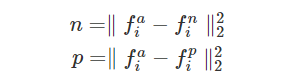

In [25]:
# class DistanceLayer(layers.Layer):
#     # A layer to compute ‖f(A) - f(P)‖² and ‖f(A) - f(N)‖²
#     def __init__(self, **kwargs):
#         super().__init__(**kwargs)

#     def call(self, anchor, positive, negative):
#         ap_distance = tf.reduce_sum(tf.square(anchor - positive), -1)
#         an_distance = tf.reduce_sum(tf.square(anchor - negative), -1)
#         return (ap_distance, an_distance)
    

# def get_siamese_network(input_shape = (128, 128, 3)):
#     encoder = get_encoder(input_shape)
    
#     # Input Layers for the images
#     anchor_input   = layers.Input(input_shape, name="Anchor_Input")
#     positive_input = layers.Input(input_shape, name="Positive_Input")
#     negative_input = layers.Input(input_shape, name="Negative_Input")
    
#     ## Generate the encodings (feature vectors) for the images
#     encoded_a = encoder(anchor_input)
#     encoded_p = encoder(positive_input)
#     encoded_n = encoder(negative_input)
    
#     # A layer to compute ‖f(A) - f(P)‖² and ‖f(A) - f(N)‖²
#     distances = DistanceLayer()(
#         encoder(anchor_input),
#         encoder(positive_input),
#         encoder(negative_input)
#     )
    
#     # Creating the Model
#     siamese_network = Model(
#         inputs  = [anchor_input, positive_input, negative_input],
#         outputs = distances,
#         name = "Siamese_Network"
#     )
#     return siamese_network

# siamese_network = get_siamese_network()
# siamese_network.summary()

In [26]:
# plot_model(siamese_network, show_shapes=True, show_layer_names=True)

## Putting everything together
We now need to implement a model with custom training loop and loss function so we can compute the triplet loss using the three embeddings produced by the Siamese network.

We'll create a Mean metric instance to track the loss of the training process.

Triplet Loss Function:

### ![](https://miro.medium.com/max/1838/0*AX2TSZNk19_gDgTN.png)

In [27]:
# class SiameseModel(Model):
#     # Builds a Siamese model based on a base-model
#     def __init__(self, siamese_network, margin=1.0):
#         super(SiameseModel, self).__init__()
        
#         self.margin = margin
#         self.siamese_network = siamese_network
#         self.loss_tracker = metrics.Mean(name="loss")

#     def call(self, inputs):
#         return self.siamese_network(inputs)

#     def train_step(self, data):
#         # GradientTape get the gradients when we compute loss, and uses them to update the weights
#         with tf.GradientTape() as tape:
#             loss = self._compute_loss(data)
            
#         gradients = tape.gradient(loss, self.siamese_network.trainable_weights)
#         self.optimizer.apply_gradients(zip(gradients, self.siamese_network.trainable_weights))
        
#         self.loss_tracker.update_state(loss)
#         return {"loss": self.loss_tracker.result()}

#     def test_step(self, data):
#         loss = self._compute_loss(data)
        
#         self.loss_tracker.update_state(loss)
#         return {"loss": self.loss_tracker.result()}

#     def _compute_loss(self, data):
#         # Get the two distances from the network, then compute the triplet loss
#         ap_distance, an_distance = self.siamese_network(data)
#         loss = tf.maximum(ap_distance - an_distance + self.margin, 0.0)
#         return loss

#     @property
#     def metrics(self):
#         # We need to list our metrics so the reset_states() can be called automatically.
#         return [self.loss_tracker]

In [28]:
# siamese_model = SiameseModel(siamese_network)

# optimizer = Adam(learning_rate=1e-3, epsilon=1e-01)
# siamese_model.compile(optimizer=optimizer)

## Training the Model
We'll now be training the siamese_model on batches of triplets. We'll print the training loss, along with additional metrics from testing every epoch. The model weights will also be saved whenever it outperforms the previous max_accuracy.

We're hoping to collect more metrics about the model to evaluate how to increase the accuracy of the model. The epochs have been set to avoid going over Kaggle's time constraint.

### Test Function
test_on_triplets() function will be responsible for testing the model on test_triplets. It'll collect metrics (accuracy, means, stds) by predicting on the train data. We'll also be printing the Accuracy of the model after testing.

In [29]:
# def test_on_triplets(batch_size = 256):
#     pos_scores, neg_scores = [], []

#     for data in get_batch(test_triplet, batch_size=batch_size):
#         prediction = siamese_model.predict(data)
#         pos_scores += list(prediction[0])
#         neg_scores += list(prediction[1])
    
#     accuracy = np.sum(np.array(pos_scores) < np.array(neg_scores)) / len(pos_scores)
#     ap_mean = np.mean(pos_scores)
#     an_mean = np.mean(neg_scores)
#     ap_stds = np.std(pos_scores)
#     an_stds = np.std(neg_scores)
    
#     print(f"Accuracy on test = {accuracy:.5f}")
#     return (accuracy, ap_mean, an_mean, ap_stds, an_stds)

In [30]:
# save_all = False
# epochs = 30
# batch_size = 128

# max_acc = 0
# train_loss = []
# test_metrics = []

# for epoch in range(1, epochs+1):
#     t = time.time()
    
#     # Training the model on train data
#     epoch_loss = []
#     for data in get_batch(train_triplet, batch_size=batch_size):
#         loss = siamese_model.train_on_batch(data)
#         epoch_loss.append(loss)
#     epoch_loss = sum(epoch_loss)/len(epoch_loss)
#     train_loss.append(epoch_loss)

#     print(f"\nEPOCH: {epoch} \t (Epoch done in {int(time.time()-t)} sec)")
#     print(f"Loss on train    = {epoch_loss:.5f}")
    
#     # Testing the model on test data
#     metric = test_on_triplets(batch_size=batch_size)
#     test_metrics.append(metric)
#     accuracy = metric[0]
    
#     # Saving the model weights
#     if save_all or accuracy>=max_acc:
#         siamese_model.save_weights("siamese_model")
#         max_acc = accuracy

# # Saving the model after all epochs run
# siamese_model.save_weights("siamese_model-final")

## Using the Model
Now that we've finished training our model, we need to extract the encoder so that we can use it to encode images and then get use the feature vectors to compute the distance between those images.

We'll also be saving the encoder for later use.

In [31]:
# def extract_encoder(model):
#     encoder = get_encoder((128, 128, 3))
#     i=0
#     for e_layer in model.layers[0].layers[3].layers:
#         layer_weight = e_layer.get_weights()
#         encoder.layers[i].set_weights(layer_weight)
#         i+=1
#     return encoder

# encoder = extract_encoder(siamese_model)
# encoder.save_weights("encoder")
# encoder.summary()

## Classify Images
To compute the distance between the encodings of the images, we'll be using distance formula. Distance over a certain threshold to be "different" and below the threshold as "same".

In [32]:
# def classify_images(face_list1, face_list2, threshold=1.3):
#     # Getting the encodings for the passed faces
#     tensor1 = encoder.predict(face_list1)
#     tensor2 = encoder.predict(face_list2)
    
#     distance = np.sum(np.square(tensor1-tensor2), axis=-1)
#     prediction = np.where(distance<=threshold, 0, 1)
#     return prediction

In [33]:
# def ModelMetrics(pos_list, neg_list):
#     true = np.array([0]*len(pos_list)+[1]*len(neg_list))
#     pred = np.append(pos_list, neg_list)
    
#     # Compute and print the accuracy
#     print(f"\nAccuracy of model: {accuracy_score(true, pred)}\n")
    
#     # Compute and plot the Confusion matrix
#     cf_matrix = confusion_matrix(true, pred)

#     categories  = ['Similar','Different']
#     names = ['True Similar','False Similar', 'False Different','True Different']
#     percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

#     labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
#     labels = np.asarray(labels).reshape(2,2)

#     sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
#                 xticklabels = categories, yticklabels = categories)

#     plt.xlabel("Predicted", fontdict = {'size':14}, labelpad = 10)
#     plt.ylabel("Actual"   , fontdict = {'size':14}, labelpad = 10)
#     plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


# pos_list = np.array([])
# neg_list = np.array([])

# for data in get_batch(test_triplet, batch_size=256):
#     a, p, n = data
#     pos_list = np.append(pos_list, classify_images(a, p))
#     neg_list = np.append(neg_list, classify_images(a, n))
#     break

# ModelMetrics(pos_list, neg_list)